# Rare Event Data Analysis
    -Logistic Regression
    -Decision Tree
    -Random Forest
    
 Motivation : To Identify fraudulent credit card transactions in a rare event dataset
 
 Dataset Source: https://www.kaggle.com/mlg-ulb/creditcardfraud
 

# Data Exploration 

In [154]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [155]:
#Import data
dataset = pd.read_csv('creditcard.csv')
#Check sample data
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [156]:
#Check for Nulls
dataset.isnull().values.any()


False

In [157]:
#Count Non Fraud vs Fraud
# 0 - Non Fraud
# 1 - Fraud
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Visualization

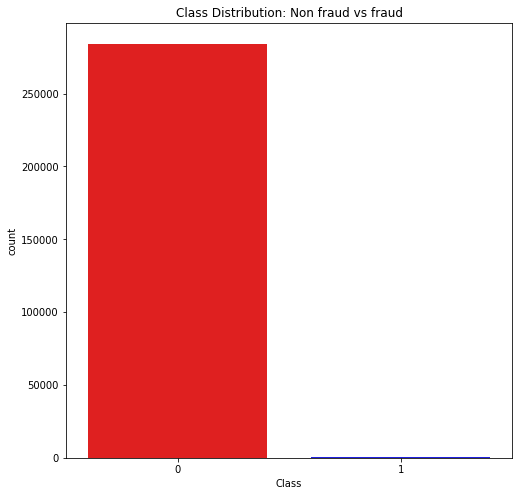

In [158]:
#Visualization: Non Fraud vs Fraud

fig = {0: 'red', 1: 'blue'}

plt.figure(figsize = (8, 8))
sns.countplot(x = 'Class', data = dataset, palette = fig)
plt.title('Class Distribution: Non fraud vs fraud')
plt.show()

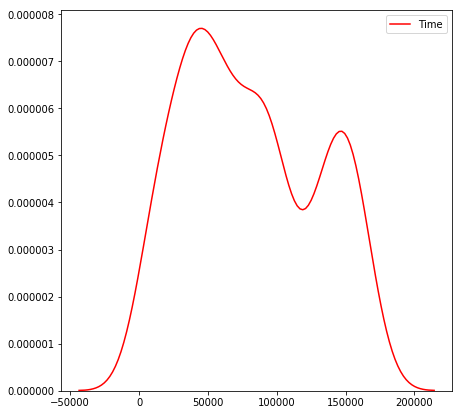

In [159]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (7, 7))
fraud = dataset[dataset['Class'] == 1]
sns.kdeplot(fraud["Time"],shade=False,color="red")


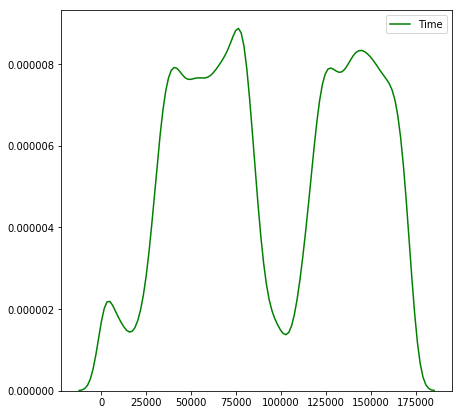

In [160]:

plt.figure(figsize = (7, 7))
nonfraud = dataset[dataset['Class'] == 0]
sns.kdeplot(nonfraud["Time"],shade=False,color="green")



# Splitting data

In [161]:
#Splitting training and testing data
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 30].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)


### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [163]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))
print('Accuracy : %f' %(metrics.accuracy_score(y_test,y_pred)));
print('Area under the curve : %f' %(metrics.roc_auc_score(y_test,y_pred)));

Precision score: 0.7402597402597403
Recall score: 0.5643564356435643
F1 Score: 0.6404494382022472
Accuracy : 0.998876
Area under the curve : 0.782002


### Random Forest 

In [164]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
#print(classification_report(y_test,RF.predict(x_test)))
#print(classification_report(y_test,y_pred))


In [165]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))
print('Accuracy : %f' %(metrics.accuracy_score(y_test,y_pred)));
print('Area under the curve : %f' %(metrics.roc_auc_score(y_test,y_pred)));

Precision score: 0.8769230769230769
Recall score: 0.5643564356435643
F1 Score: 0.6867469879518071
Accuracy : 0.999087
Area under the curve : 0.782108


### Decision Tree 

In [166]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x,y)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [167]:
print("Precision score: {}".format(precision_score(y_test,y_pred)))
print("Recall score: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))
print('Accuracy : %f' %(metrics.accuracy_score(y_test,y_pred)));
print('Area under the curve : %f' %(metrics.roc_auc_score(y_test,y_pred)));

Precision score: 0.7431192660550459
Recall score: 0.801980198019802
F1 Score: 0.7714285714285715
Accuracy : 0.999157
Area under the curve : 0.900744


# Random Undersampling

In [168]:
no_frauds = len(dataset[dataset['Class'] == 1])
non_fraud_indices = dataset[dataset.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = dataset[dataset.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = dataset.loc[under_sample_indices]


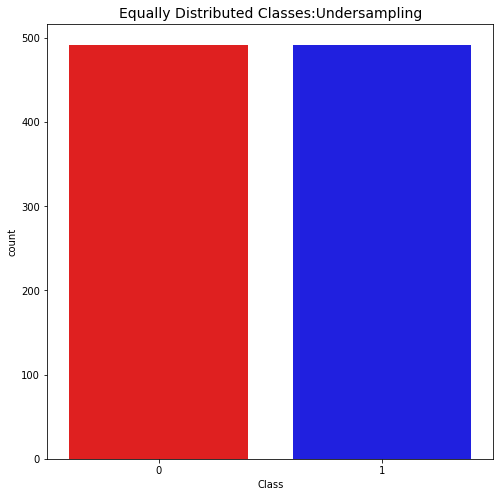

In [169]:

fig = {0: 'red', 1: 'blue'}

plt.figure(figsize = (8, 8))
sns.countplot('Class', data=under_sample, palette = fig)
plt.title('Equally Distributed Classes:Undersampling', fontsize=14)
plt.show()

In [170]:
X_under = under_sample.loc[:,under_sample.columns != 'Class']
y_under = under_sample.loc[:,under_sample.columns == 'Class']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.2, random_state = 0)





### Logistic Regression

In [171]:
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

In [172]:
print("Precision score: {}".format(precision_score(y_under_test,y_under_pred)))
print("Recall score: {}".format(recall_score(y_under_test,y_under_pred)))
print("F1 Score: {}".format(f1_score(y_under_test,y_under_pred)))
print('Accuracy : %f' %(metrics.accuracy_score(y_under_test,y_under_pred)));
print('Area under the curve : %f' %(metrics.roc_auc_score(y_under_test,y_under_pred)));

Precision score: 0.9651162790697675
Recall score: 0.9120879120879121
F1 Score: 0.9378531073446328
Accuracy : 0.944162
Area under the curve : 0.941893


# Random Oversampling

In [173]:
no_frauds = len(dataset[dataset['Class'] == 0])
non_fraud_indices = dataset[dataset.Class == 1].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=True)
fraud_indices = dataset[dataset.Class == 0].index
over_sample_indices = np.concatenate([fraud_indices,random_indices])
over_sample = dataset.loc[under_sample_indices]

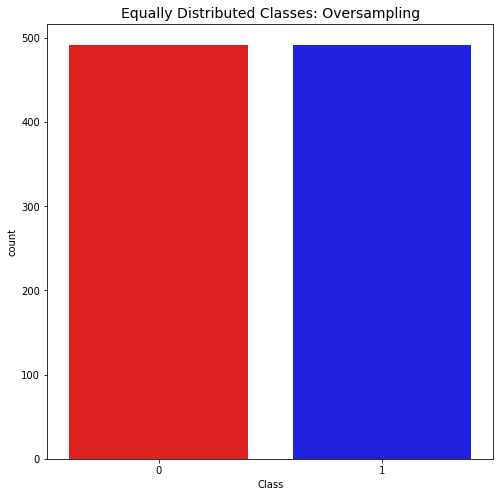

In [174]:

fig = {0: 'red', 1: 'blue'}

plt.figure(figsize = (8, 8))
sns.countplot('Class', data=over_sample,palette = fig)
plt.title('Equally Distributed Classes: Oversampling', fontsize=14)
plt.show()

In [175]:
X_over = over_sample.loc[:,over_sample.columns != 'Class']
y_over = over_sample.loc[:,over_sample.columns == 'Class']
X_over_train, X_over_test, y_over_train, y_over_test = train_test_split(X_over,y_over,test_size = 0.2, random_state = 0)



### Logistic Regression

In [176]:
lr_over = LogisticRegression()
lr_over.fit(X_over_train,y_over_train)
y_over_pred = lr_over.predict(X_over_test)

In [177]:
print("Precision score: {}".format(precision_score(y_over_test,y_over_pred)))
print("Recall score: {}".format(recall_score(y_over_test,y_over_pred)))
print("F1 Score: {}".format(f1_score(y_over_test,y_over_pred)))
print('Accuracy : %f' %(metrics.accuracy_score(y_over_test,y_over_pred)));
print('Area under the curve : %f' %(metrics.roc_auc_score(y_over_test,y_over_pred)));

Precision score: 0.9651162790697675
Recall score: 0.9120879120879121
F1 Score: 0.9378531073446328
Accuracy : 0.944162
Area under the curve : 0.941893
